# Author: Ankita Anjali
# GRIP - The Sparks Foundation
# Data Science & Business Analytics Internship
# #GRIPAPR21
# Linear Regression with Python Scikit Learn
# Task-1: Predict the percentage of an student based on the number of  study hours.
In this task, we will predict the percentage of marks a student is expected to score based on the number of hours he/she puts into studying. Since this task involves only two variables, it is a simple linear regression task.

# --------------------------------------------------------------------------------------------------------------
# Importing required libraries


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print("Imported libraries successfully")






Imported libraries successfully


# Reading data from the remote link

In [4]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Imported data successfully")

Imported data successfully


# Fetching Records

In [5]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Check for any missing values

In [6]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# To see the statistical details of the dataset 

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Checking the correlation between hours and scores

In [9]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


 (this shows that the correlation between hours and scores is high)

# Data visualization

Plotting the data points on a 2-D graph to see if we can manually find any relationship between the data.

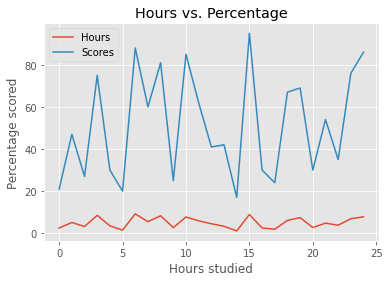

In [11]:
#visualization using line plot

plt.style.use("ggplot")
df.plot(kind = "line")
plt.title("Hours vs. Percentage")
plt.xlabel("Hours studied")
plt.ylabel("Percentage scored")
plt.show()

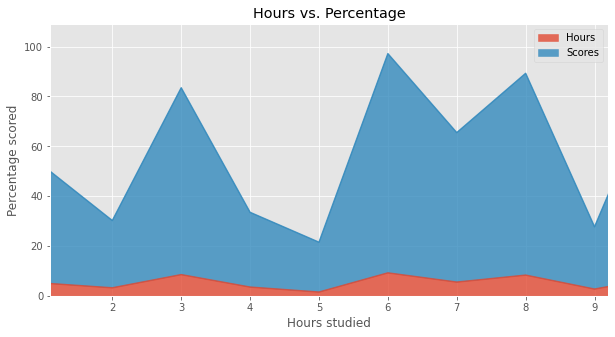

In [12]:
#visualization using area plot

xmin = min(df.Hours)
xmax = max(df.Hours)
df.plot(kind = "area", alpha = 0.8, stacked = True, figsize = (10,5), xlim = (xmin,xmax))
plt.title("Hours vs. Percentage")
plt.xlabel("Hours studied")
plt.ylabel("Percentage scored")
plt.show()

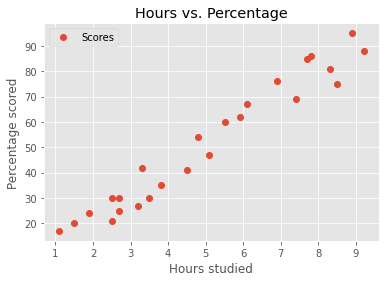

In [15]:
#visualization using scatter plot

df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs. Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage scored')
plt.show()

(from the above graph, it is clear that there is a positive linear relation between the number of hours studied and the percentage scored)

# Preparing the data

Now, we have to divide the data into "attributes" [independent variables] and "labels" [dependent variables], which are inputs and outputs respectively.

In [16]:
#to extract the attributes and labels:

X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

The next step is to split this data into training and testing sets.This can be achieved by using Scikit-Learn's built-in train_test_split() method.

In [17]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

#this splits 80% of the data into training set and the rest 20% to test set.

# Training the algorithm

In [18]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

print("Training completed!\n")
print("Intercept: ", regressor.intercept_)
print("Coefficients: ", regressor.coef_)

Training completed!

Intercept:  2.018160041434662
Coefficients:  [9.91065648]


# Plotting the regression line

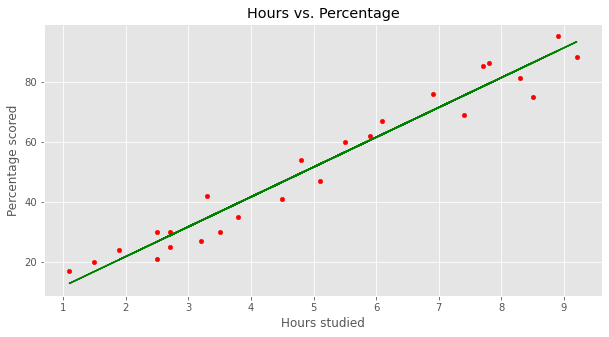

In [19]:
#we plot the fit line over the data in single linear regression

df.plot(kind="scatter", x="Hours", y="Scores", figsize=(10,5), color='r')
line = regressor.coef_[0]*X_train + regressor.intercept_
plt.plot(X_train, line, color='g')
plt.title('Hours vs. Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage scored')
plt.show()

(the green line is the best fit line for the given data)

# Making predictions

In [23]:
print(X_test)      #Testing data (in hrs)
y_pred = regressor.predict(X_test)     #Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [24]:
#compare actual vs. predicted
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# To find the predicted score if a student studies for 9.25 hrs/ day

In [25]:
output = regressor.predict([[9.25]])
print("No. of hours: 9.25")
print("Predicted score:", output)

No. of hours: 9.25
Predicted score: [93.69173249]


# Evaluating the model

The metric used here for evaluating the performance of the algorithm is "mean square error". This step is important to compare how well different algorithms perform on a particular dataset.

In [26]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

#other metrics that can be evaluated include mean squared error and root mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
